In [81]:
from fastai.vision import *
from fastai.metrics import error_rate
bs = 64 #size packet

path = untar_data(URLs.DOGS) # скачиваем локально нужный датасет



In [82]:
path.ls()

[PosixPath('/root/.fastai/data/dogscats/valid'),
 PosixPath('/root/.fastai/data/dogscats/train'),
 PosixPath('/root/.fastai/data/dogscats/test1'),
 PosixPath('/root/.fastai/data/dogscats/sample')]

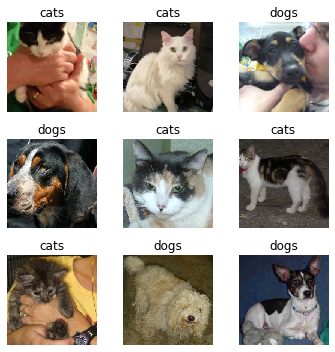

In [84]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, size=240)
data.show_batch(rows=3, figsize=(5,5))




In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(2)
learn.save('stage-1')

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


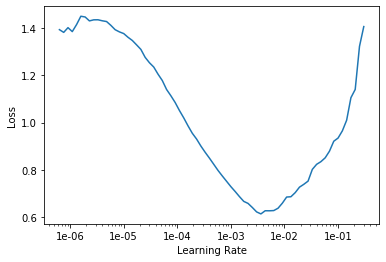

In [91]:
#разморозка
learn.unfreeze()
learn.fit_one_cycle(2)
learn.load('stage-1') # загрузим модель заново
learn.lr_find() # построим зависимость лосс - скорость обучения
learn.recorder.plot() # визуализируем зависимость

In [93]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.472724,0.408522,0.176500,03:16
1,0.100413,0.102450,0.038000,03:14
